[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9880846325167038
Confusion Matrix:
[[4634   70]
 [  37 4239]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4704
           1       0.98      0.99      0.99      4276

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



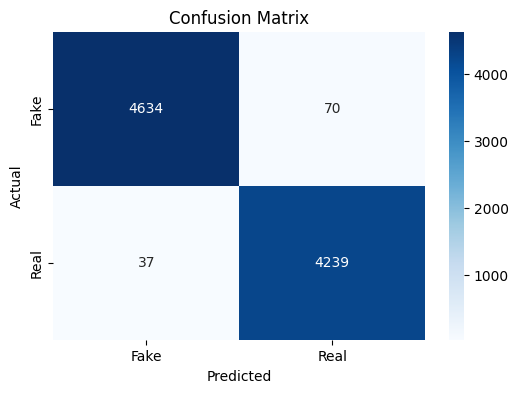

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download necessary NLTK data
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load datasets
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Add a label column
df_fake['label'] = 0
df_true['label'] = 1

# Combine datasets
df = pd.concat([df_fake, df_true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset

# Remove unnecessary columns
df = df.drop(['title', 'subject', 'date'], axis=1)

# Function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([c for c in text if c not in ('!', '.', ':', ',', '?', '-', '_', ';')])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df['text'] = df['text'].apply(preprocess_text)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(tfidf_train, y_train)

# Predict on test data
y_pred = model.predict(tfidf_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
